In [10]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)


def scatter(X, Y, ax=plt):
    ax.scatter(X, Y, color="#d3d3d3", alpha=0.9, s=5)


def lineplot(X, Y, color="darkred", ax=plt):
    ax.plot(X, Y, color=color, linewidth=0.7)

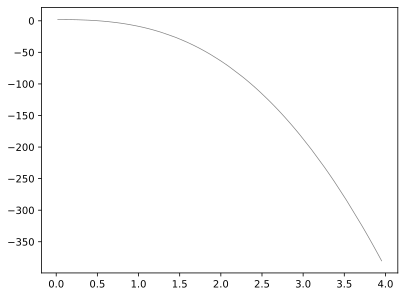

In [31]:
X = np.sort(np.random.uniform(0, 4, 100))
f = 0.5 * X**4 + -7.1 * X**3 - 4.2 * X**2 + 2
lineplot(X, f, color="grey")

# Task 1
Let $U$ be an (n+1) dimensional vector a space of continous functions $u_k(x)$ $(k \in {1,..., n})$.
The uniform approximation is the problem of finding a function $\hat{u} = \sum_{k=0}^n c_ku_k \in U$
that minimizes $max_{x \in X}|f(x) - \hat{u}(x)|$ on some descrete X, where $f(x) = 0.5x^4 - 7.1x^3 - 4.2x^2 + 2$.


# Task 2


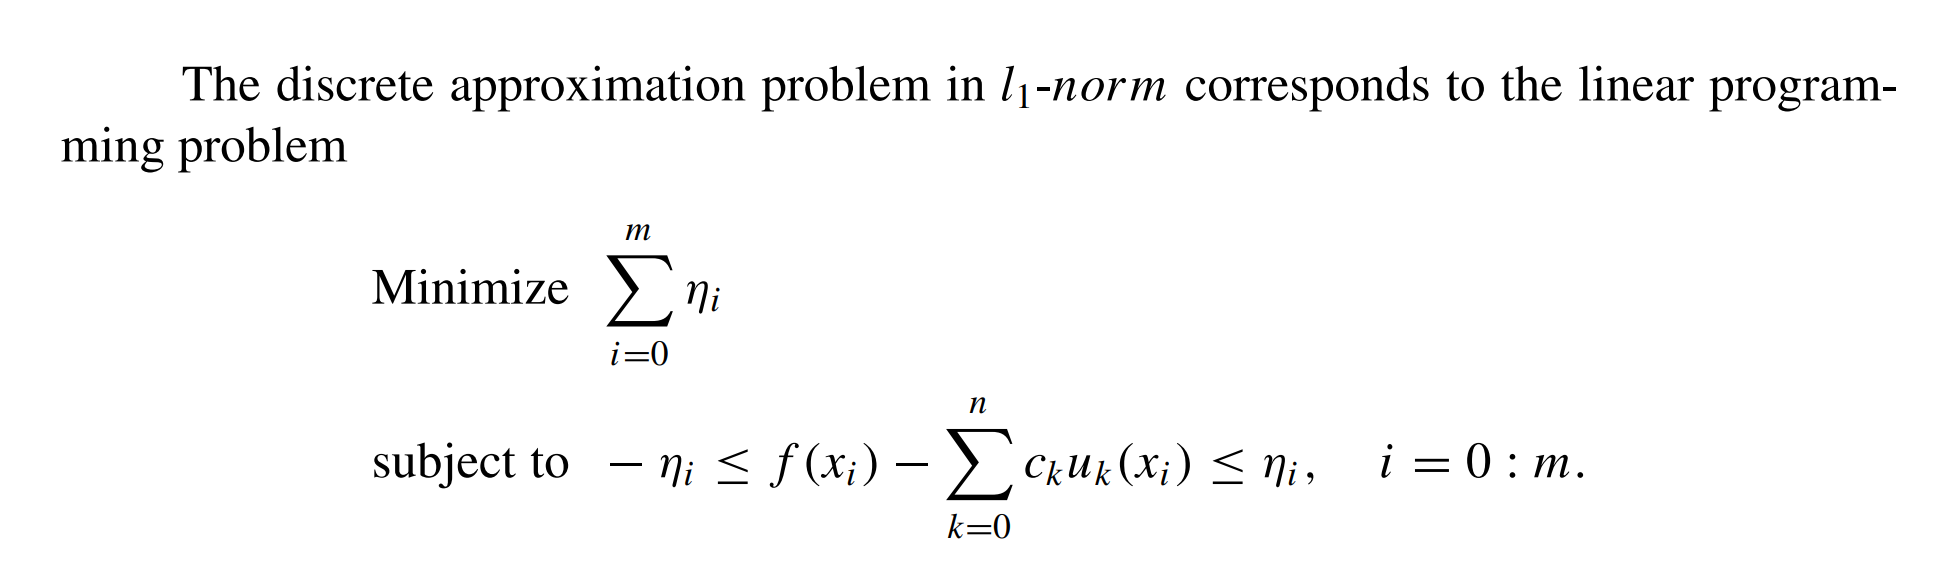

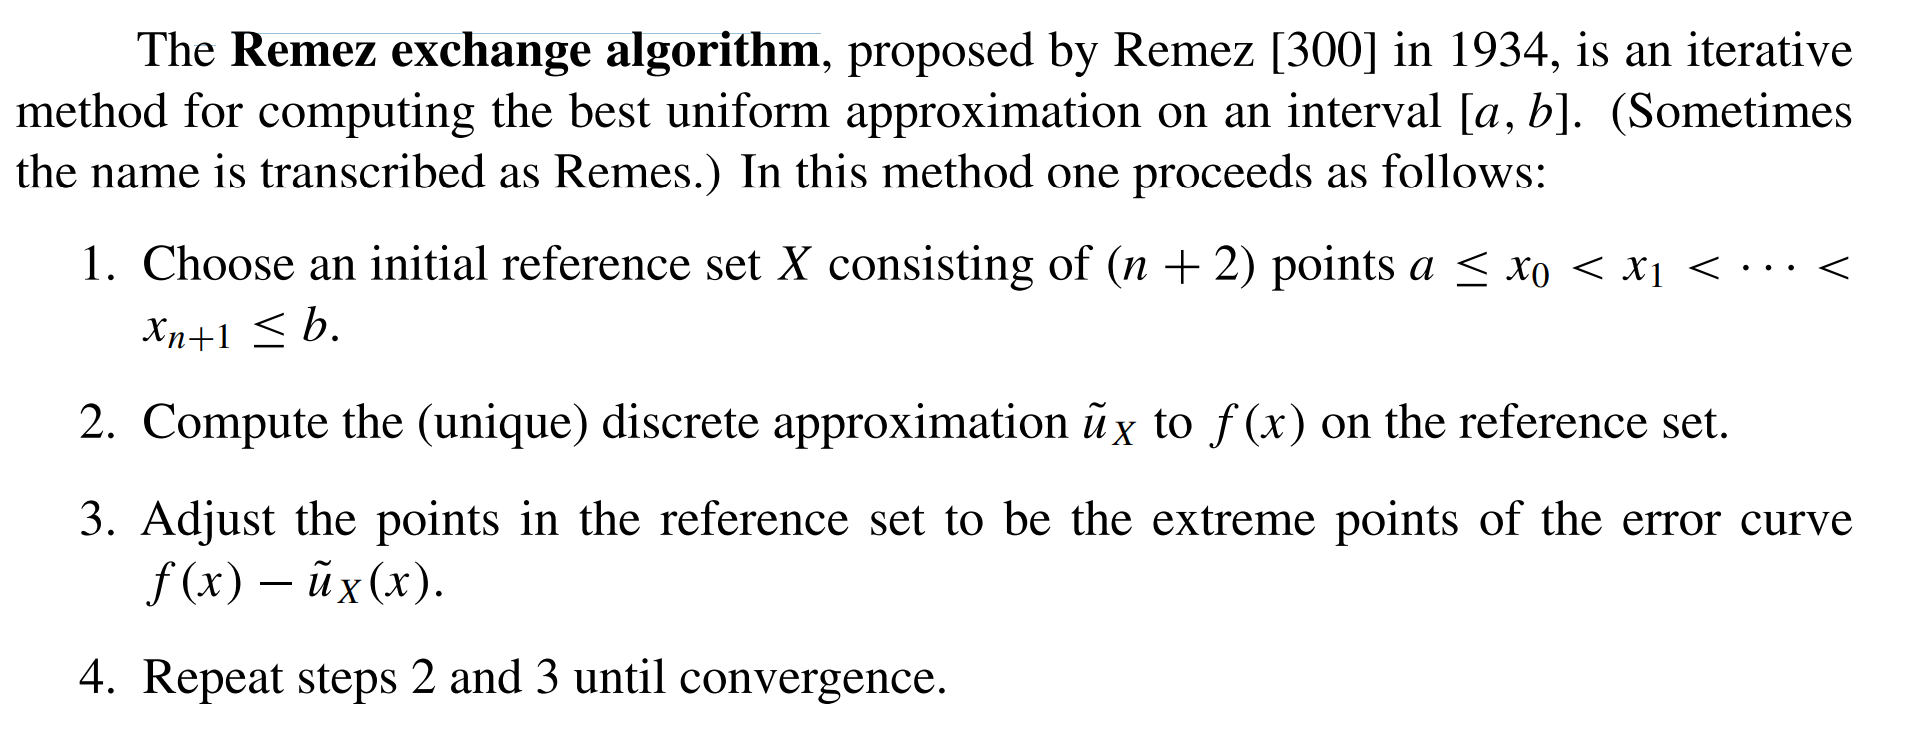

[source](https://fmipa.umri.ac.id/wp-content/uploads/2016/03/Dahlquist_G._Bjoerck_A._Vol.1._Numerical_methodBookZZ.org_.pdf)

In [60]:
def unipolifit(X, degree=4):
    degree += 1
    c = cp.Variable(degree)
    u = np.vander(X, degree) @ c
    objective = cp.Minimize(cp.max(cp.abs(f - u)))
    problem = cp.Problem(objective)
    problem.solve()
    return lambda x: np.vander(x, degree) @ c.value

/home/ventus/.local/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


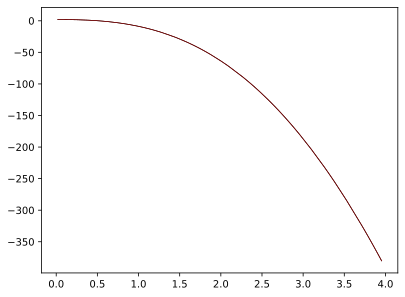

In [61]:
lineplot(X, f, color="black")
lineplot(X, unipolifit(X)(X))